TP réalisé par :
- Angéline MARC
- Thomas HUGUENEL

In [21]:
import numpy as np 
np.set_printoptions(threshold=10000, suppress = True) 
import pandas as pd 
import warnings 
import matplotlib.pyplot as plt 
warnings.filterwarnings('ignore')
import gensim

from utilsfunction import *

%load_ext autoreload
%autoreload 2
import importlib, utilsfunction
importlib.reload(utilsfunction)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<module 'utilsfunction' from 'c:\\Users\\runhi\\Desktop\\TAA_TP2\\utilsfunction.py'>

In [2]:
data = pd.read_csv('PubMed-multi-label-dataset.csv', sep=",")
data.head(3)

,Title,abstractText,meshMajor,pmid,meshid,meshroot,A,B,C,D,E,F,G,H,I,J,L,M,N,Z
0,Expression of p53 and coexistence of HPV in pr...,Fifty-four paraffin embedded tissue sections f...,"['DNA Probes, HPV', 'DNA, Viral', 'Female', 'H...",8549602,"[['D13.444.600.223.555', 'D27.505.259.750.600....","['Chemicals and Drugs [D]', 'Organisms [B]', '...",0,1,1,1,1,0,0,1,0,0,0,0,0,0
1,Vitamin D status in pregnant Indian women acro...,The present cross-sectional study was conducte...,"['Adult', 'Alkaline Phosphatase', 'Breast Feed...",21736816,"[['M01.060.116'], ['D08.811.277.352.650.035'],...","['Named Groups [M]', 'Chemicals and Drugs [D]'...",0,1,1,1,1,1,1,0,1,1,0,1,1,1
2,[Identification of a functionally important di...,The occurrence of individual amino acids and d...,"['Amino Acid Sequence', 'Analgesics, Opioid', ...",19060934,"[['G02.111.570.060', 'L01.453.245.667.060'], [...","['Phenomena and Processes [G]', 'Information S...",1,1,0,1,1,0,1,0,0,0,1,0,0,0


In [3]:
data_prep = prepare_data(data)
corpus = data_prep['abstractText']
corpus = corpus.apply(lambda line : gensim.utils.simple_preprocess((line)))

In [4]:
entrainement_model(corpus, model_size=100)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

In [5]:
model=gensim.models.Word2Vec.load('./models/Word2vec_entraine.h5')

## Analyse

In [6]:
# Liste des mots appris par le modèle
print(list(model.wv.index_to_key[:50]))

['the', 'patients', 'in', 'study', 'cells', 'we', 'results', 'group', 'treatment', 'this', 'cell', 'significantly', 'increased', 'expression', 'compared', 'levels', 'data', 'analysis', 'activity', 'protein', 'significant', 'associated', 'showed', 'clinical', 'effect', 'disease', 'different', 'high', 'effects', 'higher', 'years', 'these', 'control', 'however', 'time', 'age', 'risk', 'observed', 'cancer', 'groups', 'human', 'cases', 'studies', 'gene', 'rate', 'use', 'blood', 'mean', 'model', 'health']


In [7]:
# Taille du vocabulaire
print(len(model.wv))

# Similarité entre deux mots
print(model.wv.similarity('disease', 'cancer'))

# Mots les plus similaires à un mot donné
print(model.wv.most_similar('disease', topn=10))
print(model.wv.most_similar('study', topn=10))

93728
0.3748683
[('diseases', 0.7527409791946411), ('diseasemethods', 0.5976795554161072), ('pathology', 0.5349037051200867), ('diseaseaims', 0.5274307131767273), ('vasculitis', 0.525515079498291), ('failure', 0.5116703510284424), ('amyloidosis', 0.5091491341590881), ('dementia', 0.5060352683067322), ('psoriasis', 0.49340924620628357), ('infection', 0.49088796973228455)]
[('investigation', 0.6802132725715637), ('work', 0.6612730026245117), ('paper', 0.6202476620674133), ('article', 0.5745474696159363), ('studies', 0.5383625626564026), ('experiment', 0.5316569209098816), ('substudy', 0.5200176239013672), ('trial', 0.516074001789093), ('metaanalysis', 0.5119209289550781), ('research', 0.4997224509716034)]


On peut voir que le modèle a appris un total de 93728 mots. Il n'a pas l'air très efficace sur la similarité entre deux mots données. En effet il ne trouve une similarité faile entre des mots comme "disease" et "cancer" (0.38) ou encore "study" et "studies" (0.53). Dans le premier cas, cela peut venir du fait qu'il existe plusieurs autres mots qui contiennent le mot "disease" comme le pluriel "diseases" ou encore "diseasemethods". En revanche, dans le deuxième cas, il n'y a pas d'explication évidente étant donnée que pour "disease" le modèle trouve bien une similarité avec le pluriel.

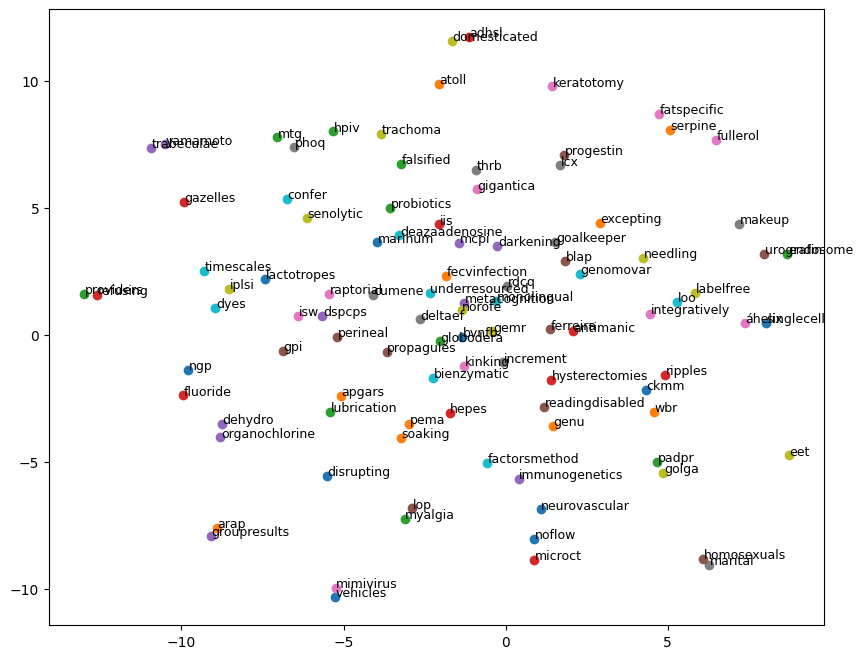

In [8]:
# Evalutaion avec tsne
from sklearn.manifold import TSNE
import random

mots_aleratoire = random.sample(list(model.wv.index_to_key), 100)

word_vectors = np.array([model.wv[mot] for mot in mots_aleratoire])

tsne = TSNE(n_components=2, random_state=42, perplexity=5)
word_vectors_2d = tsne.fit_transform(word_vectors)

plt.figure(figsize=(10, 8))
for i, word in enumerate(mots_aleratoire):
    plt.scatter(word_vectors_2d[i, 0], word_vectors_2d[i, 1])
    plt.text(word_vectors_2d[i, 0] + 0.02, word_vectors_2d[i, 1] + 0.02, word, fontsize=9)

plt.show()

In [10]:
# Analogie
result = model.wv.most_similar(positive=['patient', 'study'], negative=['drug'], topn=1)
print("Résultat de l'analogie 'patient - drug + study':")
print(result)


Résultat de l'analogie 'patient - drug + study':
[('case', 0.5013337731361389)]


In [12]:
word2vec_vectoriser(corpus, data_prep.drop(columns=['abstractText']), model)

{'model': 'Classifier Chain + Random Forest', 'F1 Score (micro)': 0.8302441326640065, 'F1 Score (macro)': 0.680282475535442, 'Zero-One Loss': 0.86176}
{'model': 'Classifier Chain + MLP', 'F1 Score (micro)': 0.7994853189335134, 'F1 Score (macro)': 0.6961992400168479, 'Zero-One Loss': 0.90364}
{'model': 'Classifier Chain + KNN', 'F1 Score (micro)': 0.8226589951423012, 'F1 Score (macro)': 0.7106149528870248, 'Zero-One Loss': 0.8772}
{'model': 'Multi Output Classifier + Random Forest', 'F1 Score (micro)': 0.8305189043761985, 'F1 Score (macro)': 0.6805638131327874, 'Zero-One Loss': 0.85888}
{'model': 'Multi Output Classifier + MLP', 'F1 Score (micro)': 0.8003998316498316, 'F1 Score (macro)': 0.6971647297721902, 'Zero-One Loss': 0.90676}
{'model': 'Multi Output Classifier + KNN', 'F1 Score (micro)': 0.8232863836592689, 'F1 Score (macro)': 0.7115518595544736, 'Zero-One Loss': 0.87656}


Sauvegarde au cas où :

```python
{'model': 'Classifier Chain + Random Forest', 'F1 Score (micro)': 0.8302441326640065, 'F1 Score (macro)': 0.680282475535442, 'Zero-One Loss': 0.86176}
{'model': 'Classifier Chain + MLP', 'F1 Score (micro)': 0.7994853189335134, 'F1 Score (macro)': 0.6961992400168479, 'Zero-One Loss': 0.90364}
{'model': 'Classifier Chain + KNN', 'F1 Score (micro)': 0.8226589951423012, 'F1 Score (macro)': 0.7106149528870248, 'Zero-One Loss': 0.8772}
{'model': 'Multi Output Classifier + Random Forest', 'F1 Score (micro)': 0.8305189043761985, 'F1 Score (macro)': 0.6805638131327874, 'Zero-One Loss': 0.85888}
{'model': 'Multi Output Classifier + MLP', 'F1 Score (micro)': 0.8003998316498316, 'F1 Score (macro)': 0.6971647297721902, 'Zero-One Loss': 0.90676}
{'model': 'Multi Output Classifier + KNN', 'F1 Score (micro)': 0.8232863836592689, 'F1 Score (macro)': 0.7115518595544736, 'Zero-One Loss': 0.87656}
```

In [14]:
word2vec_vectoriser(corpus, data_prep.drop(columns=['abstractText']), model, tfidf=True)

{'model': 'Classifier Chain + Random Forest', 'F1 Score (micro)': 0.8164862062699745, 'F1 Score (macro)': 0.6476754386958287, 'Zero-One Loss': 0.88028}
{'model': 'Classifier Chain + MLP', 'F1 Score (micro)': 0.7828132877709932, 'F1 Score (macro)': 0.6732654976863325, 'Zero-One Loss': 0.92344}
{'model': 'Classifier Chain + KNN', 'F1 Score (micro)': 0.8048091275567547, 'F1 Score (macro)': 0.6808380534100312, 'Zero-One Loss': 0.89844}
{'model': 'Multi Output Classifier + Random Forest', 'F1 Score (micro)': 0.8153604231442765, 'F1 Score (macro)': 0.6460445229863534, 'Zero-One Loss': 0.88536}
{'model': 'Multi Output Classifier + MLP', 'F1 Score (micro)': 0.7833902936765238, 'F1 Score (macro)': 0.6746231807121689, 'Zero-One Loss': 0.92668}
{'model': 'Multi Output Classifier + KNN', 'F1 Score (micro)': 0.804856316228545, 'F1 Score (macro)': 0.680057358727493, 'Zero-One Loss': 0.89848}


L'utilisation de Tf-Idf a, dans la plus part des cas, fait baisser les performances de notre modèle. Il n'y a que pour Classifier Chain + KNN où les résultats sont légèrement meilleurs.

In [ ]:
model_Google = gensim.models.KeyedVectors.load_word2vec_format('./models/GoogleNews-vectors-negative300.bin', binary=True)
word2vec_vectoriser(corpus, data_prep.drop(columns=['abstractText']), model_Google, google=True)

{'model': 'Classifier Chain + Random Forest', 'F1 Score (micro)': 0.8219404136248677, 'F1 Score (macro)': 0.6548926440710116, 'Zero-One Loss': 0.87784}
{'model': 'Classifier Chain + MLP', 'F1 Score (micro)': 0.7970829688800835, 'F1 Score (macro)': 0.6927917272923817, 'Zero-One Loss': 0.90612}
{'model': 'Classifier Chain + KNN', 'F1 Score (micro)': 0.8101037124541807, 'F1 Score (macro)': 0.6817814315861097, 'Zero-One Loss': 0.89432}
{'model': 'Multi Output Classifier + Random Forest', 'F1 Score (micro)': 0.8211347059034889, 'F1 Score (macro)': 0.6550684071200384, 'Zero-One Loss': 0.87692}
{'model': 'Multi Output Classifier + MLP', 'F1 Score (micro)': 0.7973857590811401, 'F1 Score (macro)': 0.6925641534965569, 'Zero-One Loss': 0.9108}
{'model': 'Multi Output Classifier + KNN', 'F1 Score (micro)': 0.8178893089453494, 'F1 Score (macro)': 0.6992036294460151, 'Zero-One Loss': 0.8904799999999999}


[{'model': 'Classifier Chain + Random Forest',
  'F1 Score (micro)': 0.8219404136248677,
  'F1 Score (macro)': 0.6548926440710116,
  'Zero-One Loss': 0.87784},
 {'model': 'Classifier Chain + MLP',
  'F1 Score (micro)': 0.7970829688800835,
  'F1 Score (macro)': 0.6927917272923817,
  'Zero-One Loss': 0.90612},
 {'model': 'Classifier Chain + KNN',
  'F1 Score (micro)': 0.8101037124541807,
  'F1 Score (macro)': 0.6817814315861097,
  'Zero-One Loss': 0.89432},
 {'model': 'Multi Output Classifier + Random Forest',
  'F1 Score (micro)': 0.8211347059034889,
  'F1 Score (macro)': 0.6550684071200384,
  'Zero-One Loss': 0.87692},
 {'model': 'Multi Output Classifier + MLP',
  'F1 Score (micro)': 0.7973857590811401,
  'F1 Score (macro)': 0.6925641534965569,
  'Zero-One Loss': 0.9108},
 {'model': 'Multi Output Classifier + KNN',
  'F1 Score (micro)': 0.8178893089453494,
  'F1 Score (macro)': 0.6992036294460151,
  'Zero-One Loss': 0.8904799999999999}]

De même que précédemment, l'utilisations d'un modèle pré-entrainer provenant de Google n'a pas amélioré les performances de notre modèle.

Le meilleur modèle reste donc Multi Output Classifier + Random Forest avec un F1 Score (micro) de 0.83.

In [22]:
best_model(model, data)

{'model': 'Multi Output Classifier + Random Forest', 'F1 Score (micro)': 0.8305189043761985, 'F1 Score (macro)': 0.6805638131327874, 'Zero-One Loss': 0.85888}


{'model': 'Multi Output Classifier + Random Forest',
 'F1 Score (micro)': 0.8305189043761985,
 'F1 Score (macro)': 0.6805638131327874,
 'Zero-One Loss': 0.85888}